<h1>Buisness Intelligence - Sheet 3 </h1>
<h3> Camilo Andrés Vega Agudelo - 0000163913</h3>
<h3> Juan Felipe Herrera Rincon - 0000156342</h3>
<h3> Johan Nicolas Imbachi Nino - 0000179756 </h3>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2
credits = pd.read_csv('credits.csv')
numpy_credits = credits.iloc[:, [0, 1]].to_numpy()

# Exercise 2.1 - by Juan Felipe Herrera Rincon ( also 1.1 )
<b>a)</b> Write a function binarizeCategoricalAttributeVector(column) that takes a categorical attribute vector (do not assume a categorical Pandas type) and re- turns an n × m dimensional numpy array, where m is the number of categorical values occurring in the column and n is the length of the original column.

In [4]:
def binarizeCategoricalAttributeVector(column):
    copy = column.copy()
    df = pd.DataFrame(copy)
    categorias = df[0].unique()
    columns = categorias.size()
    vector=[]
    cont=0
    for categoria in categorias:
        for valor in df[0]:
            if(categoria == valor):
                fila = np.zeros(columns,dtype=int)
                fila[cont]=1
                vector.append(fila)
        cont=cont+1
        
    matrix = np.array(vector)
    return matrix

<b>b)</b> Then write a function getCategoricalAttributes(df) that returns a list of col- umn names of a Pandas DataFrame that contain non-numeric values.


In [5]:
def getCategoricalAttributes(df):
    return list(df.select_dtypes(exclude=[np.number]).columns)

<b>c)</b> Finally, write a function readFrameAsMatrix(df) to convert a given DataFrame into a purely numeric nd array, expanding categorical features to binary vectors.

In [6]:
def readFrameAsMatrix(df):
    catAttr = getCategoricalAttributes(df)
    for attr in catAttr:
        vectors = binarizeCategoricalAttributeVector(df[attr].values)
        df = pd.concat([df, pd.DataFrame(vectors)], axis=1)
        df.drop([attr],axis=1, inplace=True)
    
    matrix = df.values
    return matrix

# Exercise 2.2
<b>a)</b> Write a function discretizeBasedOnThresholds(column, thresholds, names=None)
that takes a vector of observations, the desired thresholds and optionally names for
the bins; if no names are given, name the bins c0,c1,... The first bin contains all
instances with values at most the lowest threshold, and the last bin contains all
instances with values greater than the biggest threshold. Hence, the number of
bins is the number of thresholds + 1. The function should return a vector with the
discretized values.

In [7]:
def discretizeBasedOnThreshold(column, thresholds, names=None):
    creditsSorted = credits.sort_values(by=[column])
    minValue = credits[column].min()
    maxValue = credits[column].max()
    
    #Verify Sorted Data is working
    #print (creditsSorted)
    
    for i in thresholds:
        maxLimit = i
        df= creditsSorted.loc[(creditsSorted['age']>= minValue) & (creditsSorted['age']< maxLimit)]
        minValue = i
        print (df)
        
        #Dataframes correct but missing the last one, between the last limit of the threshold
        #And the maximum value of the DF... Other DF are ok, Sorted and Printed in different DF's
        #Fix the bins names
        
limits=[20,30]    
discretizeBasedOnThreshold('age', limits)

       age          workclass  fnlwgt      education  education-num  \
32598   17            Private  133449            9th              5   
29817   17   Self-emp-not-inc  181317           10th              6   
36580   17            Private  147339           10th              6   
26409   17            Private  186677           11th              7   
19520   17                  ?  110998   Some-college             10   
...    ...                ...     ...            ...            ...   
22717   19            Private  257750   Some-college             10   
22922   19            Private  131615        HS-grad              9   
35205   19                  ?  133983   Some-college             10   
965     19            Private  260265        HS-grad              9   
29850   19                  ?  291509           12th              8   

       marital-status          occupation     relationship  \
32598   Never-married       Other-service        Own-child   
29817   Never-married  

<b>b)</b> Write functions discretizeEqualLength(column, k, names = None) and
discretizeEqualFrequency(column, k, names = None) that convert a numeric
attribute vector into a discrete attribute vector, applying the respective technique
for a specified number of bins or frequency. The parameter k is for the number of
bins. Use the above function to realize these two.

In [8]:
def discretizeEqualLength(column, k, names=None):
    
    
    creditsSorted = credits.sort_values(by=[column])
    minimumValue = credits[column].min()
    upperLimit = credits[column].max()
    equalLength = (upperLimit-minimumValue)/k
    
    for i in range (1,k+1):
        #from upper limit to lower subsctracting the equals value
        lowerLimit = upperLimit
        upperLimit = lowerLimit-equalLength
        
        rg = (lowerLimit, upperLimit)
        
        print(rg[::-1])
    
    #Discretizing values in tuples, equal length.
    
discretizeEqualLength('age', 2, ['old','young'])

(53.5, 90)
(17.0, 53.5)


# Exercise 2.3 - by Camilo Andrés Vega Agudelo
<li><p><b>a)</b> Write a function <b>getContingencyTable(M)</b> that receives a 2D numpy array with two columns and computes a table containing the <i>absolute</i> observed frequenties of the pairs of occuring values.</p></li>

In [9]:
def getContingencyTable(M):
    df = pd.DataFrame(M).sort_values(0).reset_index(drop=True)
    index = df[0].unique()
    head = df[1].unique()
    full_data = []
    data = []

    for x in index:
        row = df[df[0] == x]
        data = []

        for y in head:
            data.append(np.count_nonzero(np.where(row == y)[1]))
        full_data.append(data)
    
    contingency_table = pd.DataFrame(full_data)
    
    return(contingency_table)

contingency_table = getContingencyTable(numpy_credits)
contingency_table

,0,1,2,3,4,5,6,7,8
0,454,9,97,2,21,8,2,2,0
1,638,20,154,4,15,12,14,5,0
2,784,24,183,0,18,6,29,6,3
3,834,16,184,2,20,11,33,13,0
4,859,15,147,0,22,4,44,4,1
...,...,...,...,...,...,...,...,...,...
69,1,0,0,0,0,0,0,0,0
70,1,0,2,0,0,0,0,0,0
71,2,4,0,0,0,0,0,0,0
72,1,0,1,0,0,0,0,0,0


<li><p><b>b)</b> Write a function <b>computeExpectedOccurrences(ct)</b> that receives a contingency table and computes a table containing, for each pair of values, the number of occurences one would expect given independency of the attributes.</p></li>

In [10]:
def computeExpectedOccurrences(ct):
    array = ct.to_numpy()
    column = np.apply_over_axes(np.sum, array, 0)
    row = np.apply_over_axes(np.sum, array, 1)
    expected_frequencies = []
    
    for i in range(0, len(row)):
        
        for j in range(0, len(column)):
            exp = (column[j] * row[i]) / np.sum(array)
            
        expected_frequencies.append(exp)
    exp_freq = np.array(expected_frequencies)
        
    result = pd.DataFrame(exp_freq)
        
    return(result)

expected_values = computeExpectedOccurrences(contingency_table)
expected_values

,0,1,2,3,4,5,6,7,8
0,413.047582,47.047418,34.097805,0.121821,38.203186,20.648724,24.132816,17.444822,0.255825
1,598.398346,68.159453,49.398837,0.176487,55.346464,29.914623,34.962164,25.273003,0.370624
2,730.990090,83.262070,60.344519,0.215593,67.610008,36.543037,42.709000,30.872937,0.452746
3,772.641948,88.006347,63.782953,0.227878,71.462430,38.625261,45.142562,32.632079,0.478543
4,760.840588,86.662135,62.808730,0.224397,70.370910,38.035297,44.453053,32.133655,0.471234
...,...,...,...,...,...,...,...,...,...
69,0.694198,0.079071,0.057307,0.000205,0.064207,0.034704,0.040559,0.029319,0.000430
70,2.082593,0.237214,0.171922,0.000614,0.192621,0.104111,0.121678,0.087957,0.001290
71,4.165186,0.474428,0.343843,0.001228,0.385242,0.208222,0.243356,0.175914,0.002580
72,1.388395,0.158143,0.114614,0.000409,0.128414,0.069407,0.081119,0.058638,0.000860


<li><p><b>c)</b> Write a function <b>computeChiSquare(M)</b> that receives a 2D numpy array with two discrete columns and computes the χ2 score of the two attributes.</p></li>

In [11]:
table = np.absolute(contingency_table - expected_values)
def computeChiSquare(M):
    chi_square = np.sum(M ** 2 / expected_values)
    
    return(np.apply_over_axes(np.sum, chi_square, 0)[0])
#     return(chi_square)

chi_2 = computeChiSquare(table)
chi_2

6482.069247659155

<li><p><b>d)</b> Write a function <b>checkIndependence(df, c1, c2, alpha)</b> that receives a Pandas DataFrame and the names of two columns and that returns true if the independence hypothesis is sustained in a χ2 test (considering the appropriate degree of freedom) for a given confidence threshold α for the p-value.
</p></li>

In [12]:
def checkIndependence(df, c1, c2, alpha):
    contingency_table = getContingencyTable(df[[c1, c2]].to_numpy())
    expected_values = computeExpectedOccurrences(contingency_table)
    table = np.absolute(contingency_table - expected_values)
    chi_2 = computeChiSquare(table)
    degrees_of_freedom = (table.shape[0] - 1) * (table.shape[1] - 1)
    chi2.median(degrees_of_freedom)
    chi2.cdf(chi_2, degrees_of_freedom)
    chi2.sf(chi_2, degrees_of_freedom)
    chi2.ppf(alpha, degrees_of_freedom)
    
    return(chi2.sf(chi_2, degrees_of_freedom) > alpha)

checkIndependence(credits, 'age', 'workclass', 0.05)

False

<li><p><b>e)</b> Then check independence hypothesis for all pairs of categorical variables of the credit dataset. Plot the χ2 curve for every pair of categorical variables with the respective (given) critical point (we assume α = 0.01).</p></li>
<p>Are there pairs of independent variables?</p>

workclass vs workclass are independent: False
workclass vs education are independent: False
workclass vs marital-status are independent: False
workclass vs occupation are independent: False
workclass vs relationship are independent: False
workclass vs race are independent: False
workclass vs sex are independent: False
workclass vs native-country are independent: False
workclass vs class are independent: False
education vs workclass are independent: False
education vs education are independent: False
education vs marital-status are independent: False
education vs occupation are independent: False
education vs relationship are independent: False
education vs race are independent: False
education vs sex are independent: False
education vs native-country are independent: False
education vs class are independent: False
marital-status vs workclass are independent: False
marital-status vs education are independent: False
marital-status vs marital-status are independent: False


<ipython-input-13-7c7b2907cdc8>:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


marital-status vs occupation are independent: False
marital-status vs relationship are independent: False
marital-status vs race are independent: False
marital-status vs sex are independent: False
marital-status vs native-country are independent: False
marital-status vs class are independent: False
occupation vs workclass are independent: False
occupation vs education are independent: False
occupation vs marital-status are independent: False
occupation vs occupation are independent: False
occupation vs relationship are independent: False
occupation vs race are independent: False
occupation vs sex are independent: False
occupation vs native-country are independent: False
occupation vs class are independent: False
relationship vs workclass are independent: False
relationship vs education are independent: False
relationship vs marital-status are independent: False
relationship vs occupation are independent: False
relationship vs relationship are independent: False
relationship vs race are

()

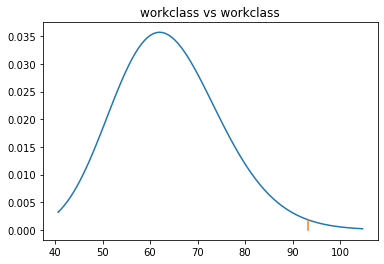

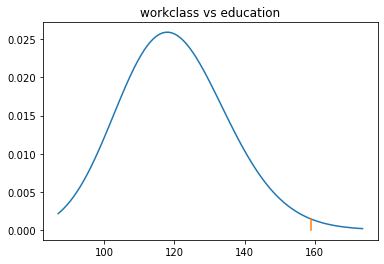

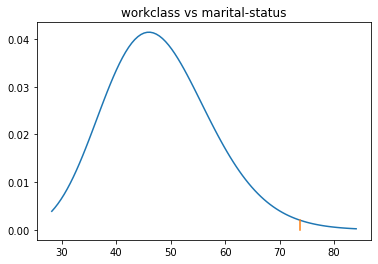

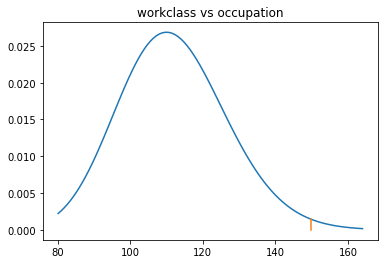

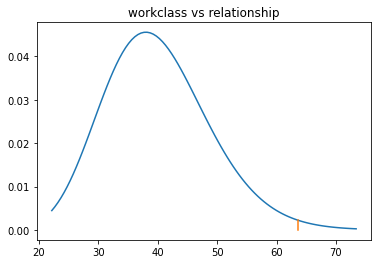

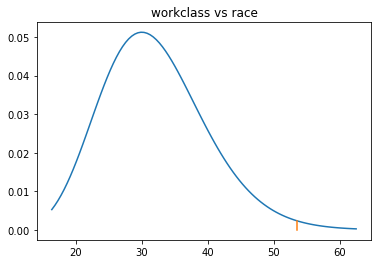

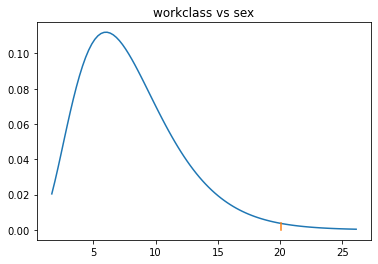

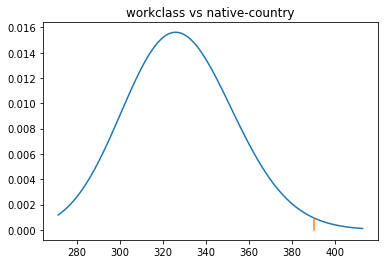

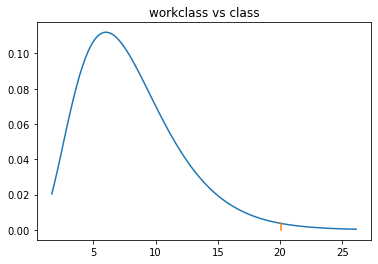

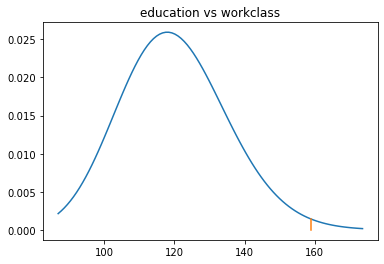

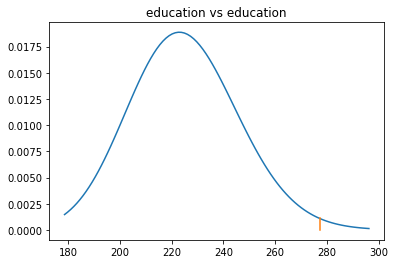

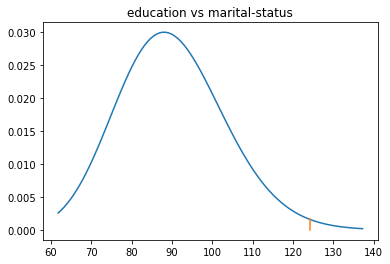

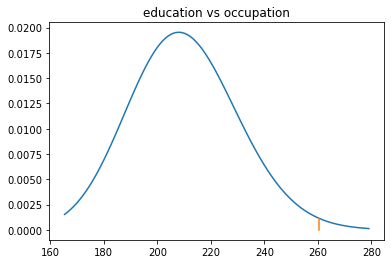

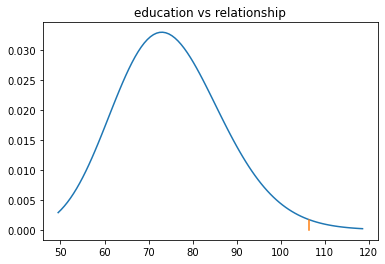

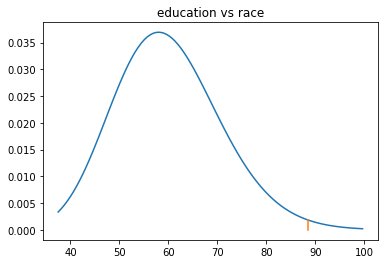

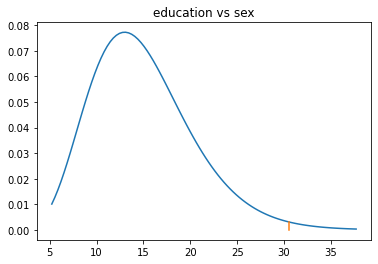

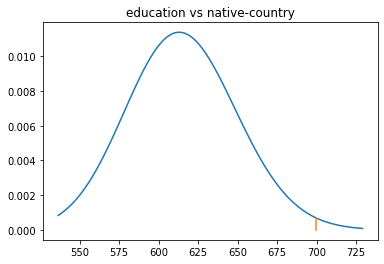

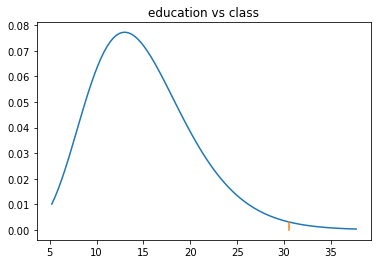

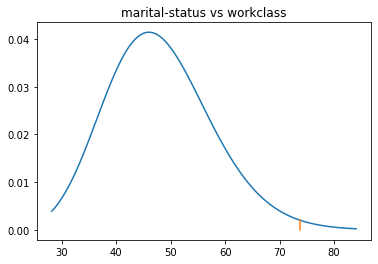

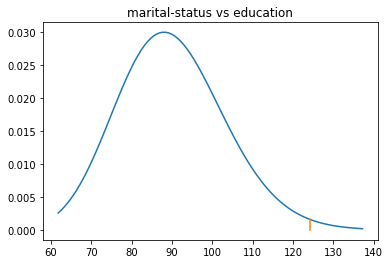

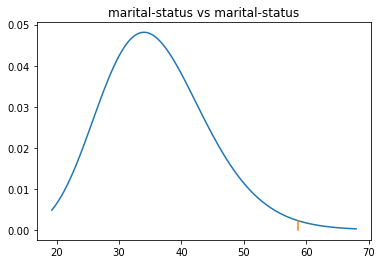

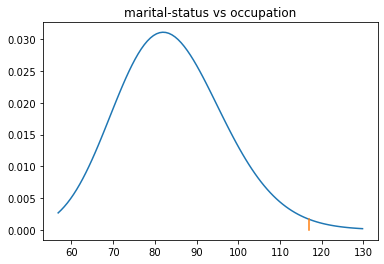

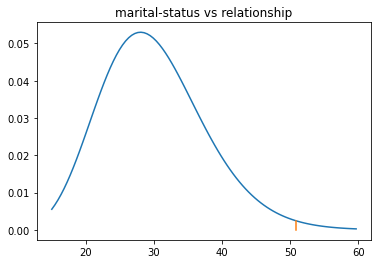

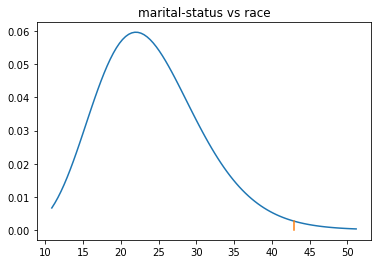

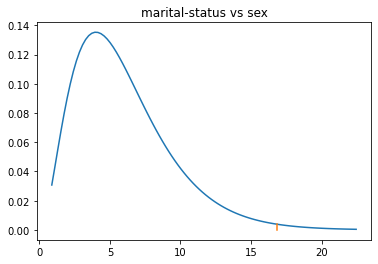

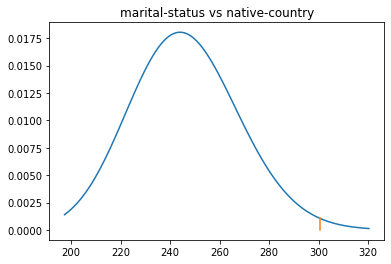

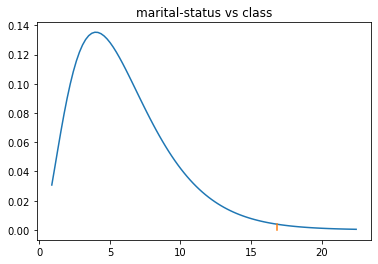

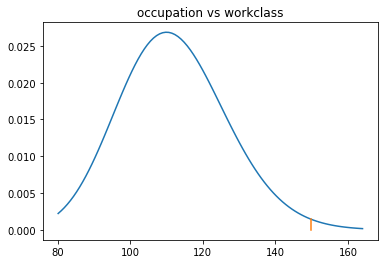

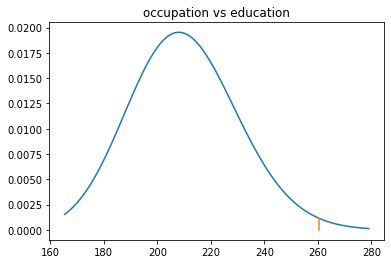

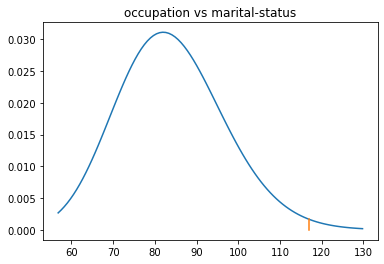

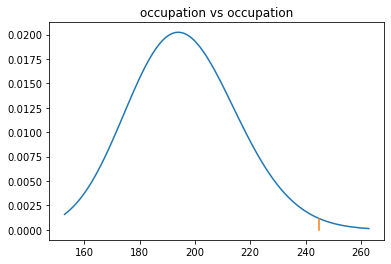

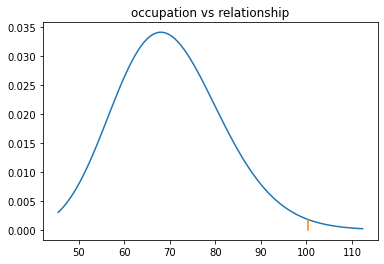

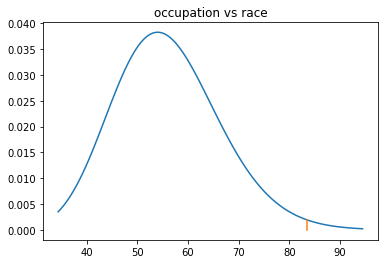

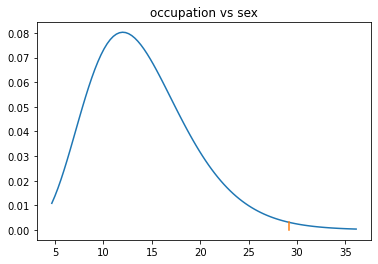

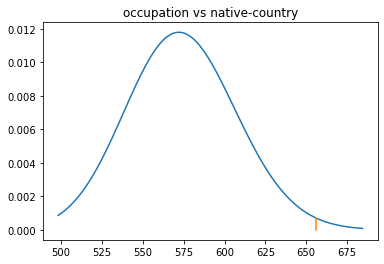

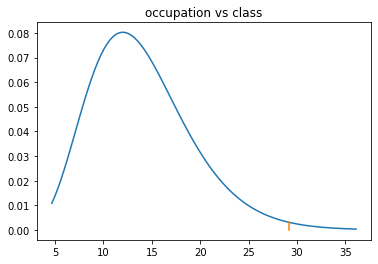

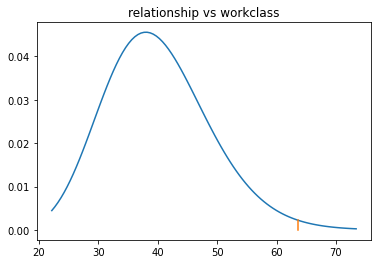

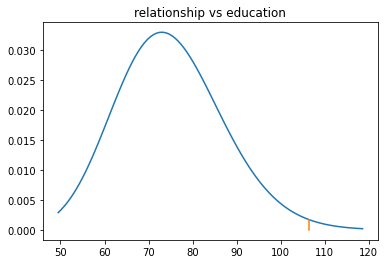

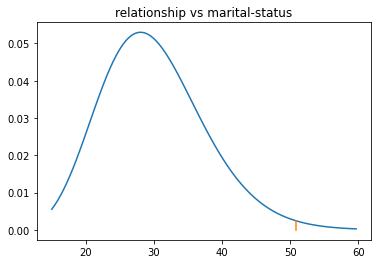

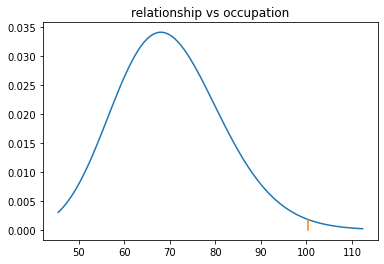

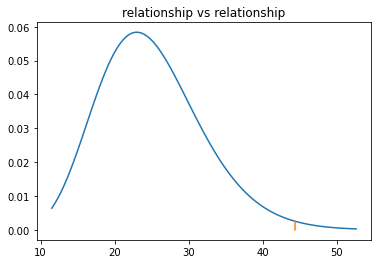

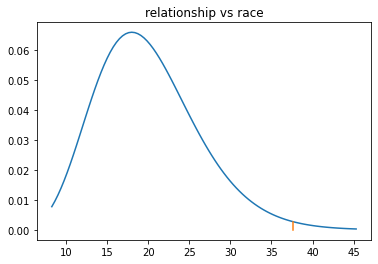

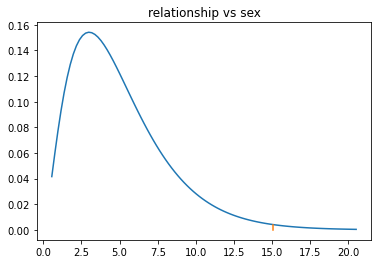

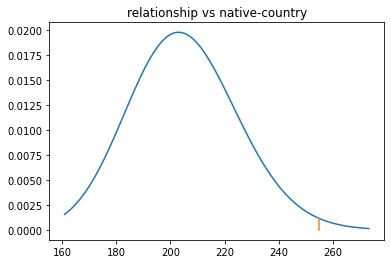

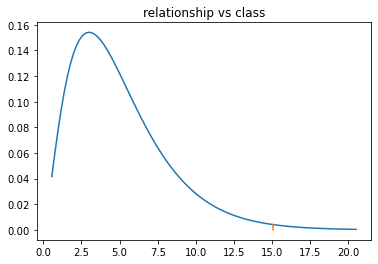

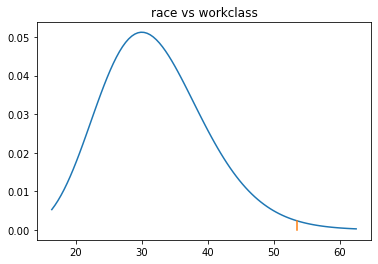

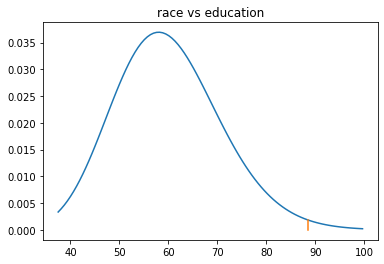

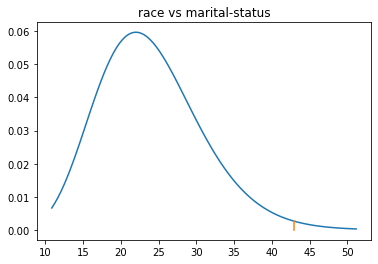

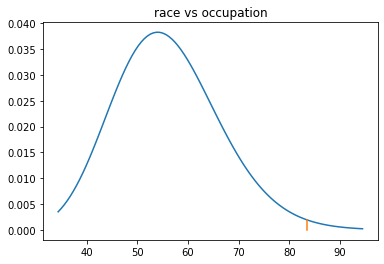

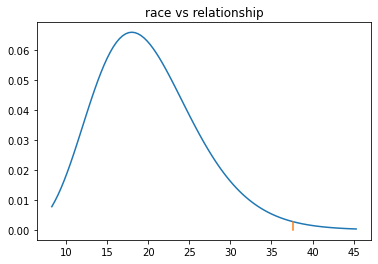

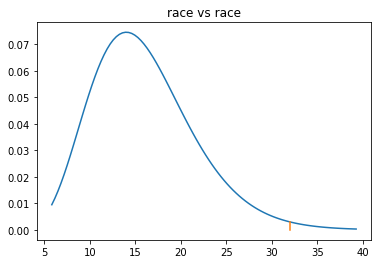

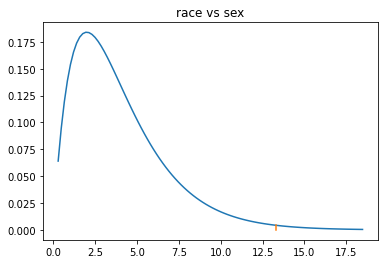

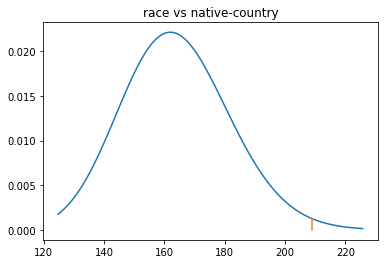

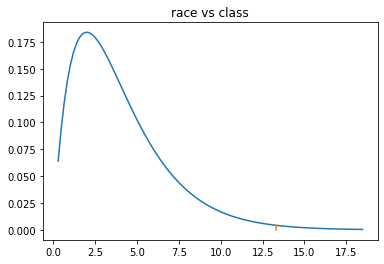

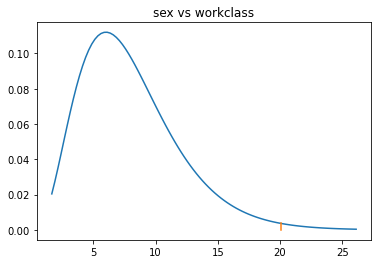

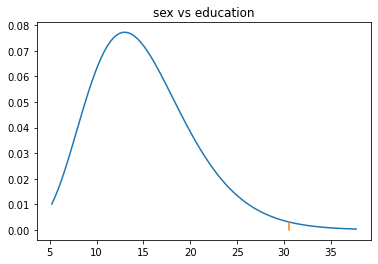

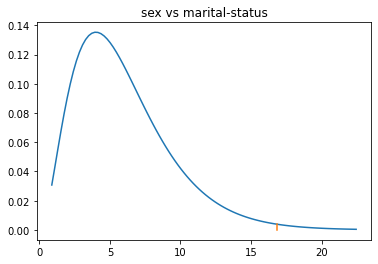

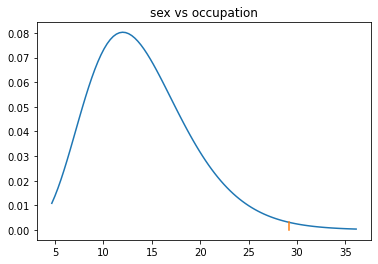

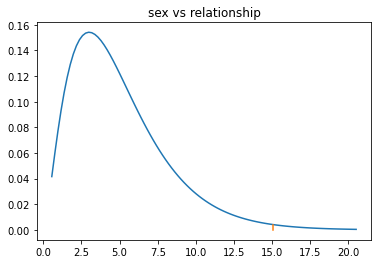

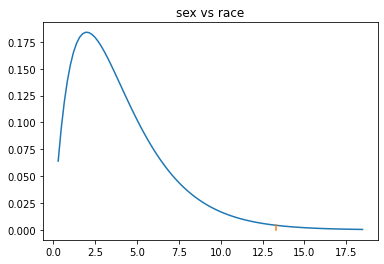

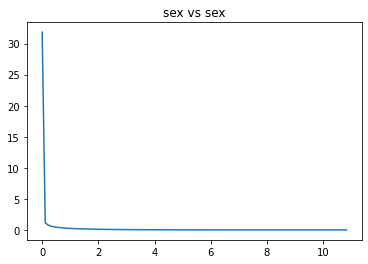

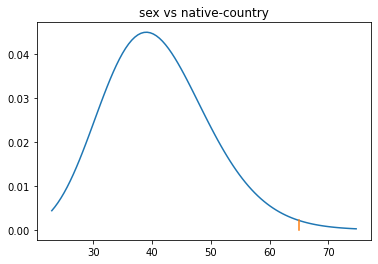

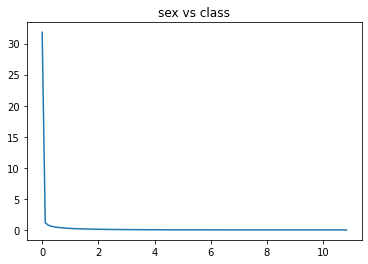

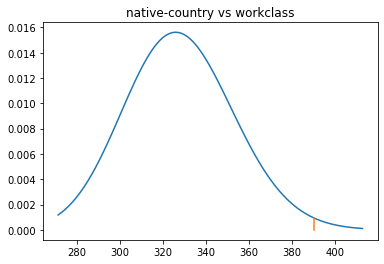

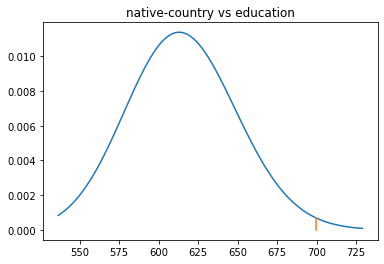

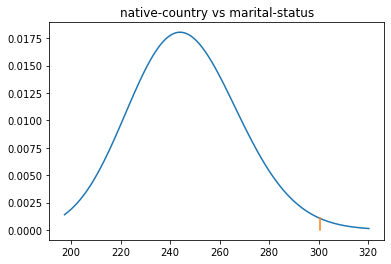

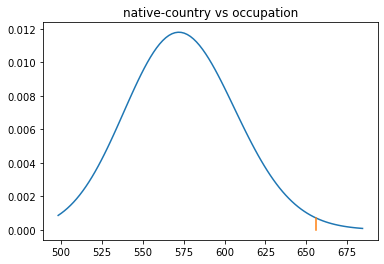

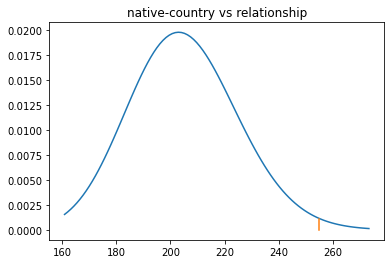

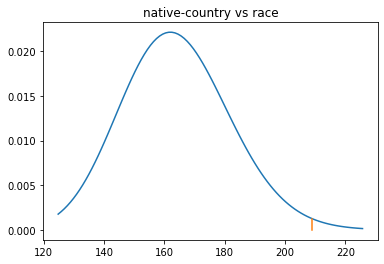

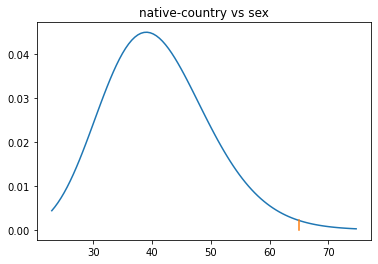

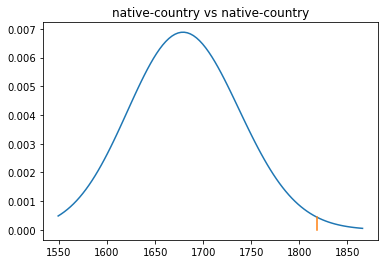

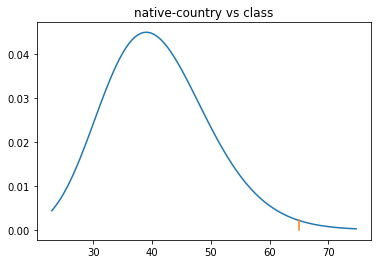

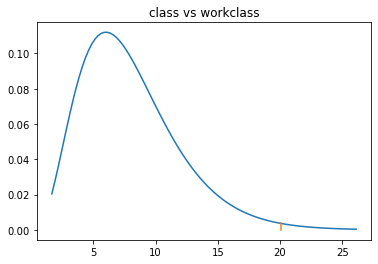

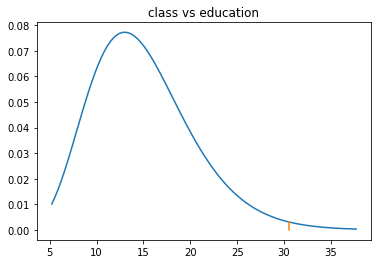

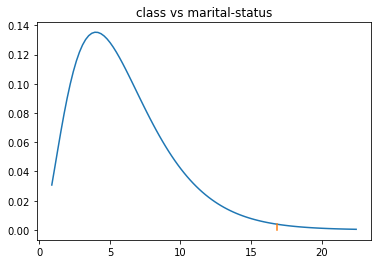

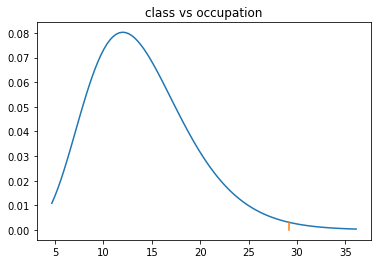

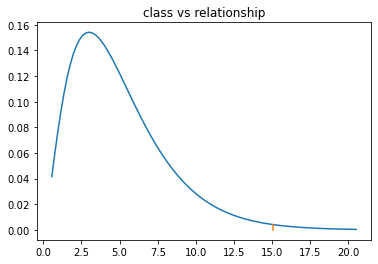

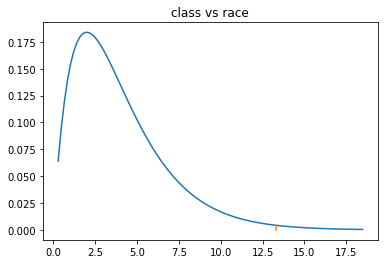

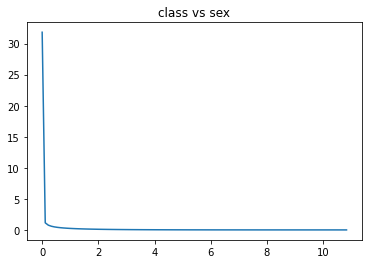

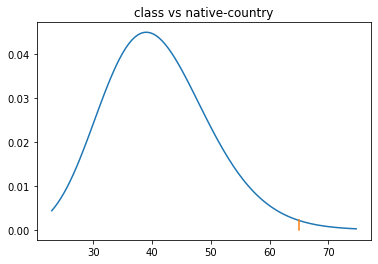

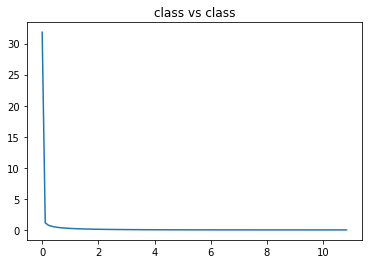

In [13]:
def plot(df, alpha):
    atributes = getCategoricalAttributes(df)

    for i, c1 in enumerate(atributes):
        for j, c2 in enumerate(atributes):
            independent = checkIndependence(df, c1, c2, alpha)
            fig = plt.figure()
            ax = fig.add_subplot(111)
            contingency_table = getContingencyTable(df[[c1, c2]].to_numpy())
            expected_values = computeExpectedOccurrences(contingency_table)
            table = np.absolute(contingency_table - expected_values)
            degrees_of_freedom = (table.shape[0] - 1) * (table.shape[1] - 1)
            x = np.linspace(chi2.ppf(0.01,degrees_of_freedom),chi2.ppf(0.999, degrees_of_freedom), 100)
            ax.plot(x, chi2.pdf(x, degrees_of_freedom))
            ppf95 = chi2.ppf(1-alpha,degrees_of_freedom)
            ax.plot([ppf95,ppf95], [0,chi2.pdf(ppf95, degrees_of_freedom)])
            ax.set_title(c1 + ' vs ' + c2)
            print(c1 + ' vs ' + c2 + ' are independent: ' + str(independent))
            
            
    
    return()


plot(credits, 0.01)